# Large scale plots

In [35]:
import os
import pandas as pd
import matplotlib. pyplot as plt

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)  # Defuault: (6, 4)
plt.rcParams['figure.dpi'] = 300

In [36]:
papers_df = pd.read_csv(os.path.join("data", "review_176995_20220502220126.csv"))
papers_df.drop("Comments (enter 'N/A' if none)", axis=1, inplace=True)

Questions:
 - How many datasets ?
 - Datasets used VS year ?

In [37]:
papers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 41 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Covidence #                                                75 non-null     int64 
 1   Study ID                                                   74 non-null     object
 2   Title                                                      75 non-null     object
 3   Reviewer Name                                              75 non-null     object
 4   Title.1                                                    75 non-null     object
 5   Year of publication                                        75 non-null     int64 
 6   Funding source                                             75 non-null     object
 7   Supervised learning                                        75 non-null     bool  
 8   Unsupervised learning 

## Automatic analysis

In [38]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(papers_df, title="Automatic Profiling Report")
# profile.to_file(os.path.join("out", "automatic_report.html"))

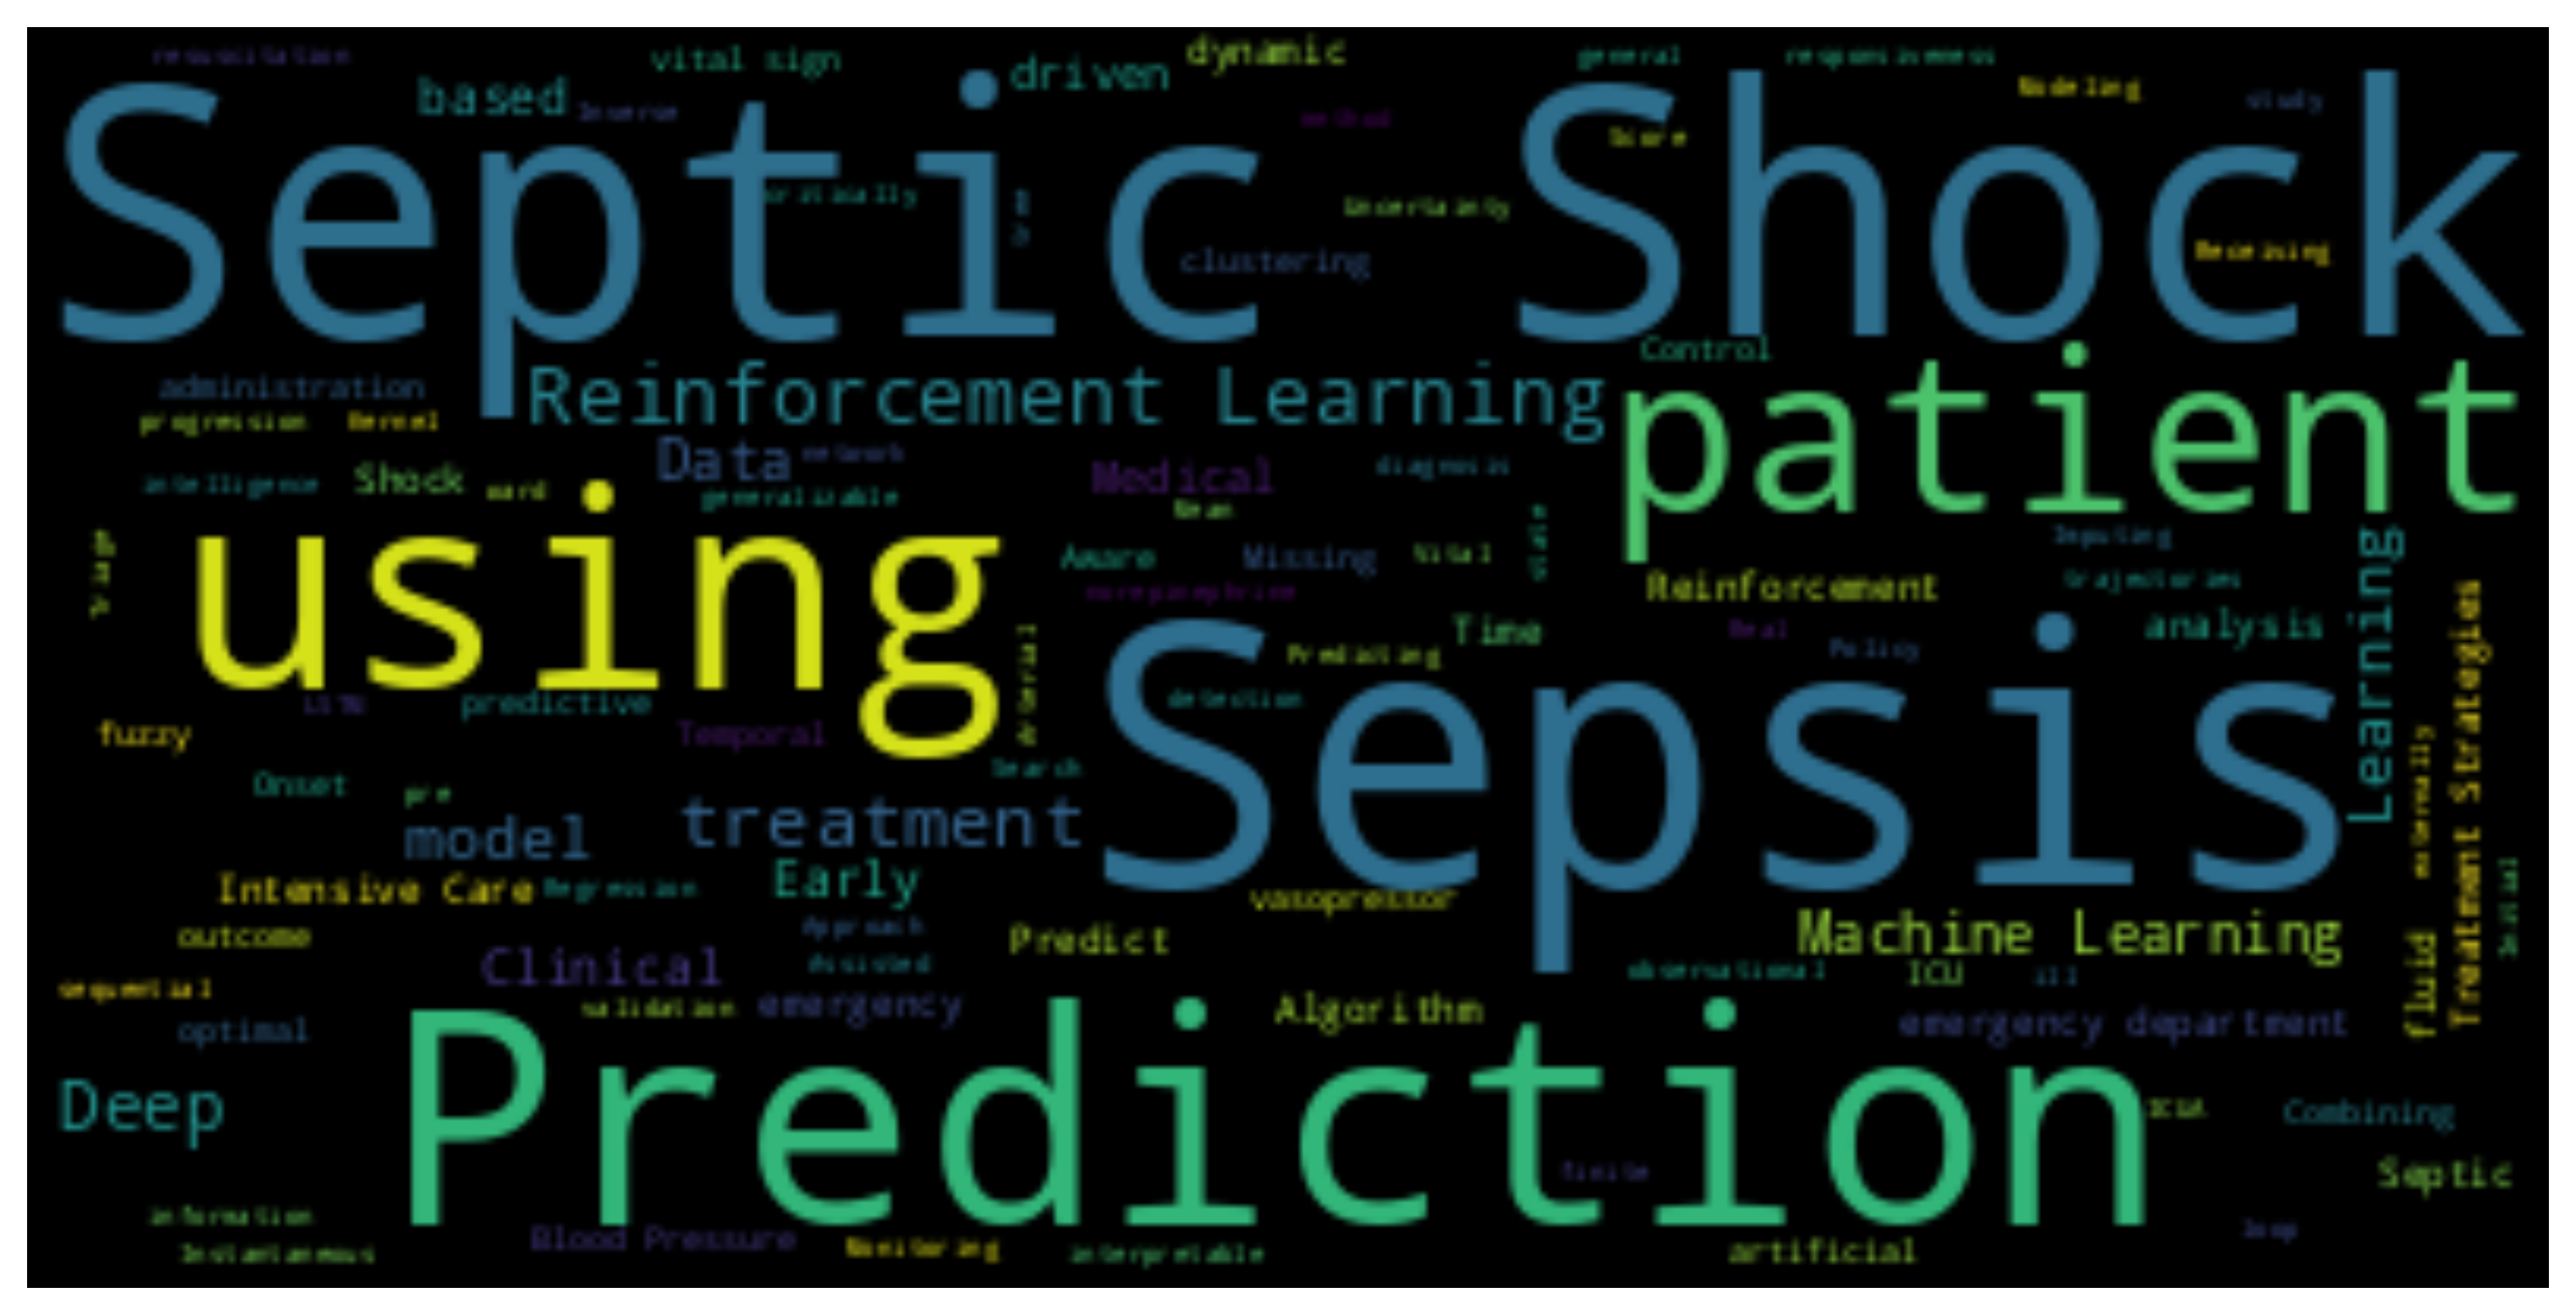

In [39]:
wordcloud = WordCloud(
    background_color="white",
).generate(papers_df["Title"].str.cat())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Funding soueces

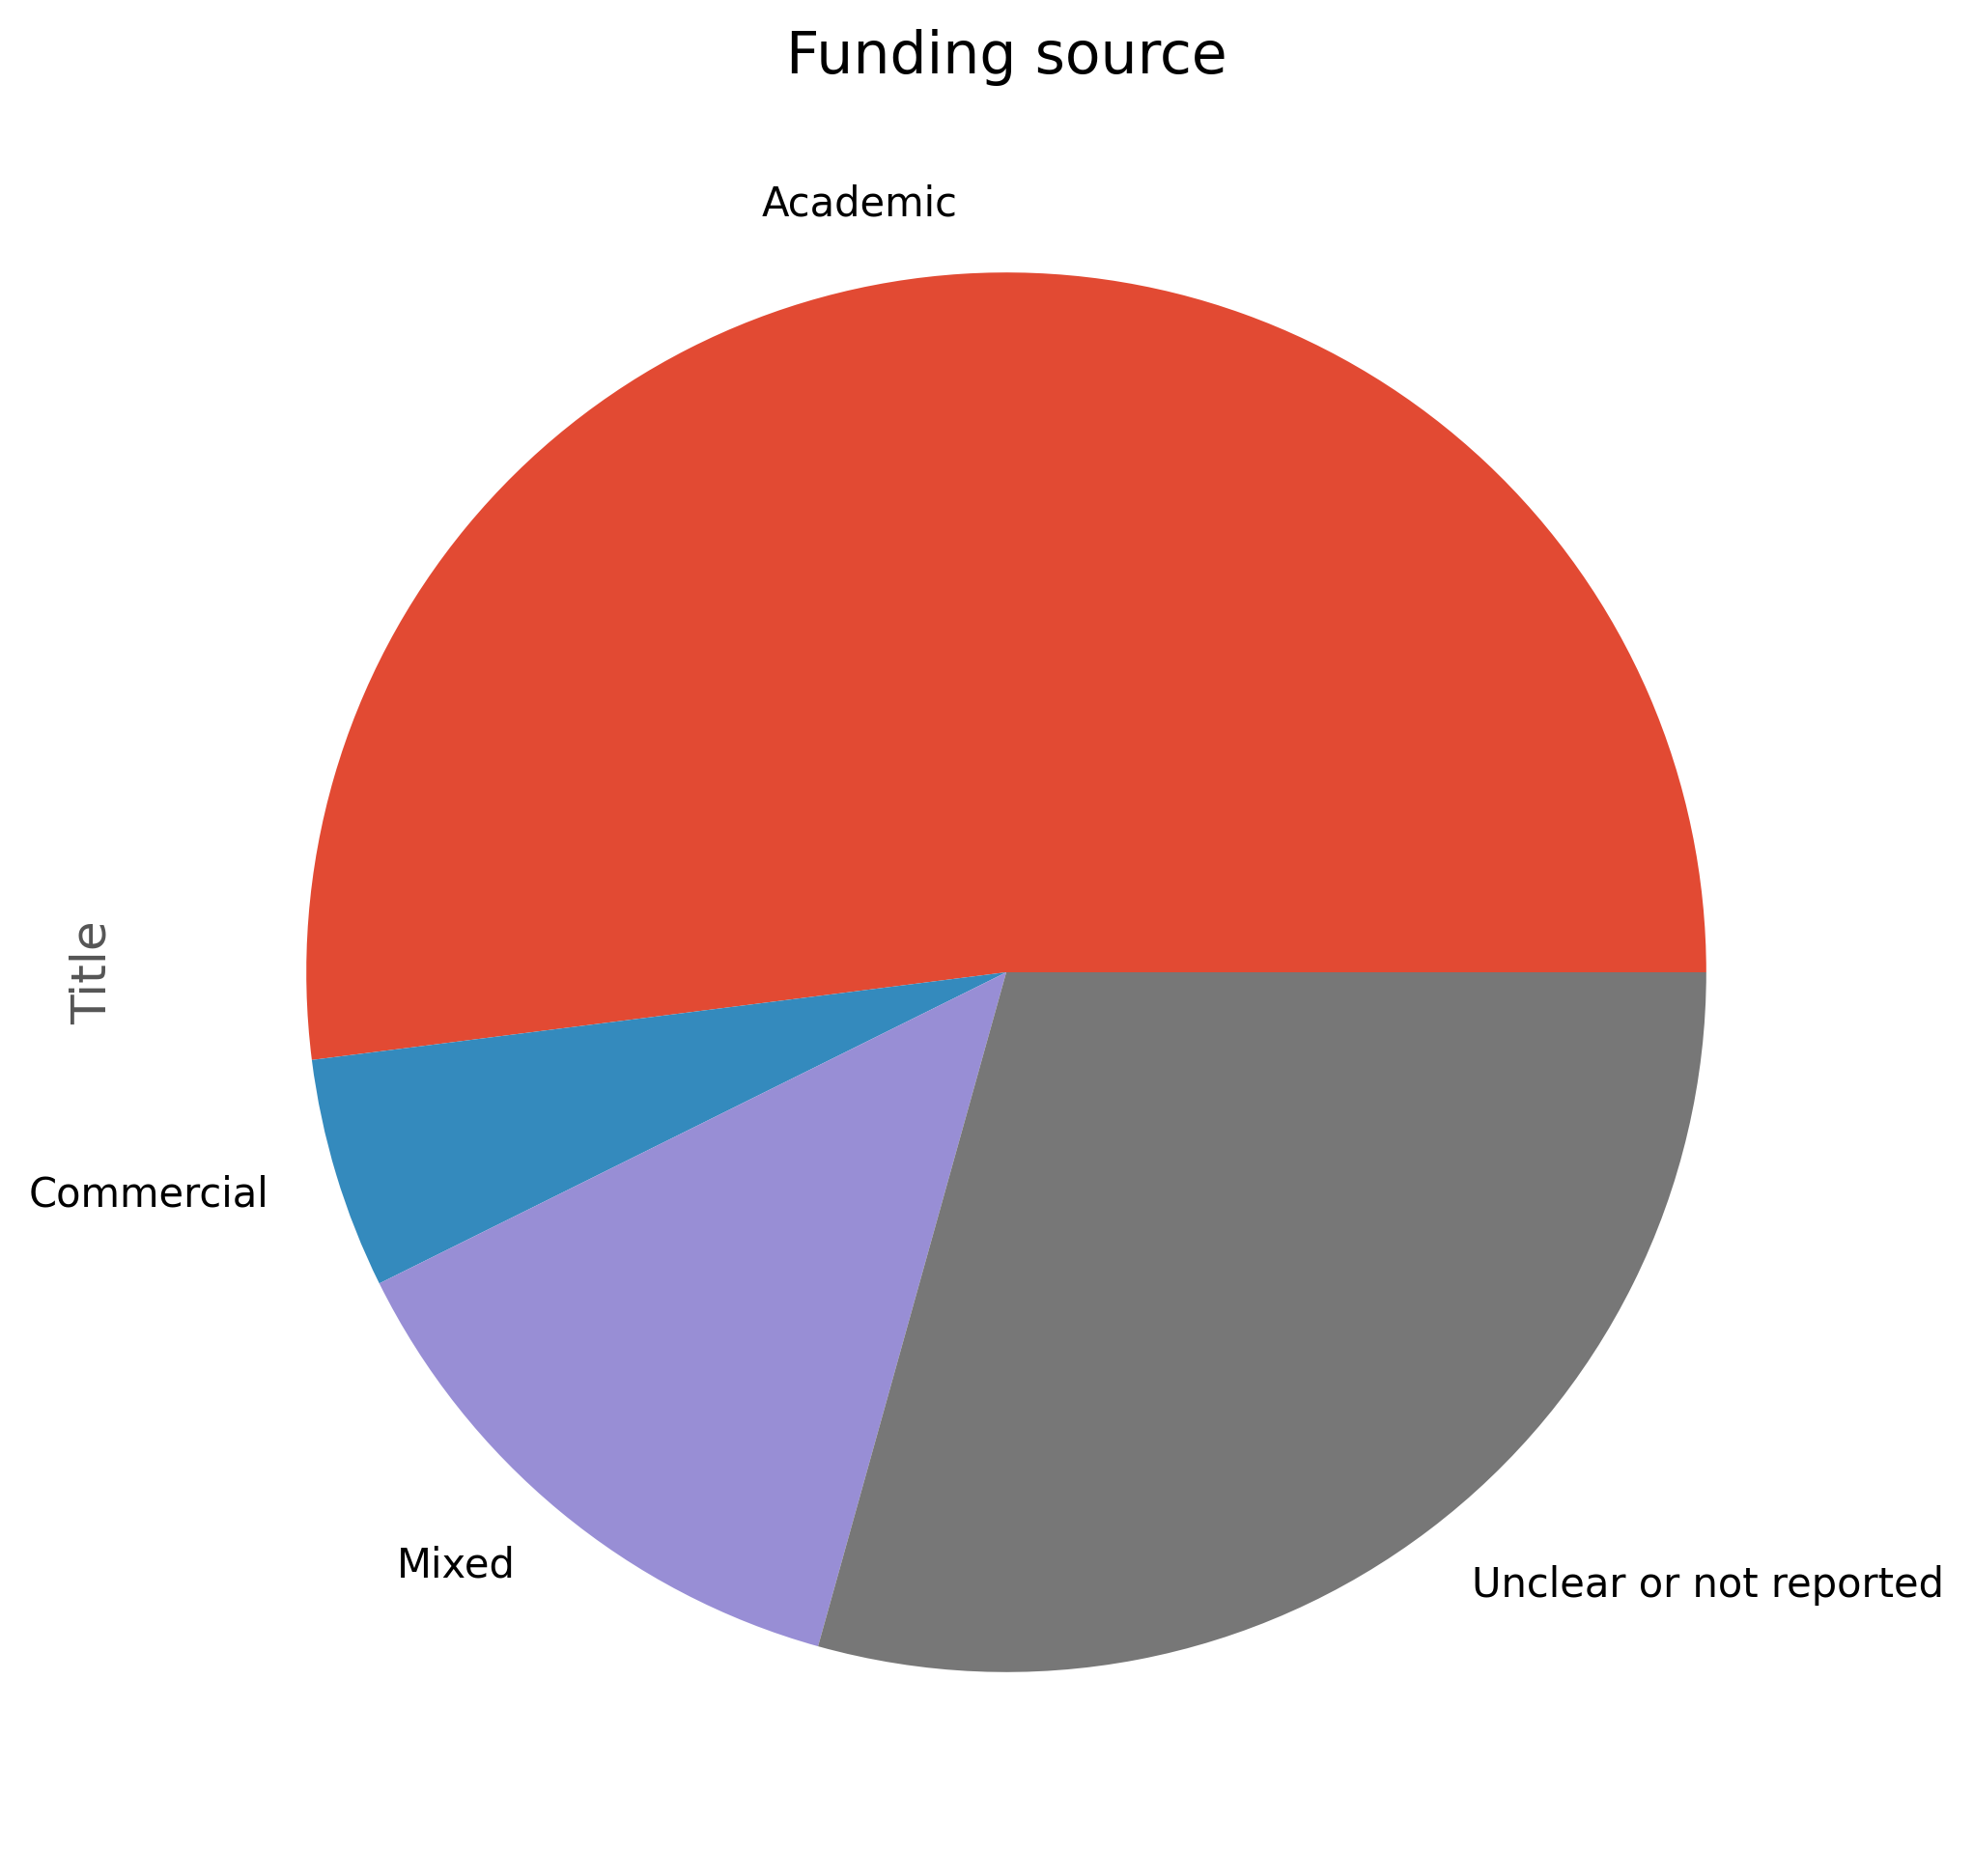

In [40]:
papers_df.groupby("Funding source")["Title"].count().plot.pie()
plt.title("Funding source")
plt.savefig(os.path.join("out", f"Funding - pie.png"))
plt.show()

In [41]:
fundong_source_df = papers_df.groupby("Funding source")["Title"].count()
fundong_source_df / fundong_source_df.sum() * 100

Funding source
Academic                   52.000000
Commercial                  5.333333
Mixed                      13.333333
Unclear or not reported    29.333333
Name: Title, dtype: float64

Funding source over the years:

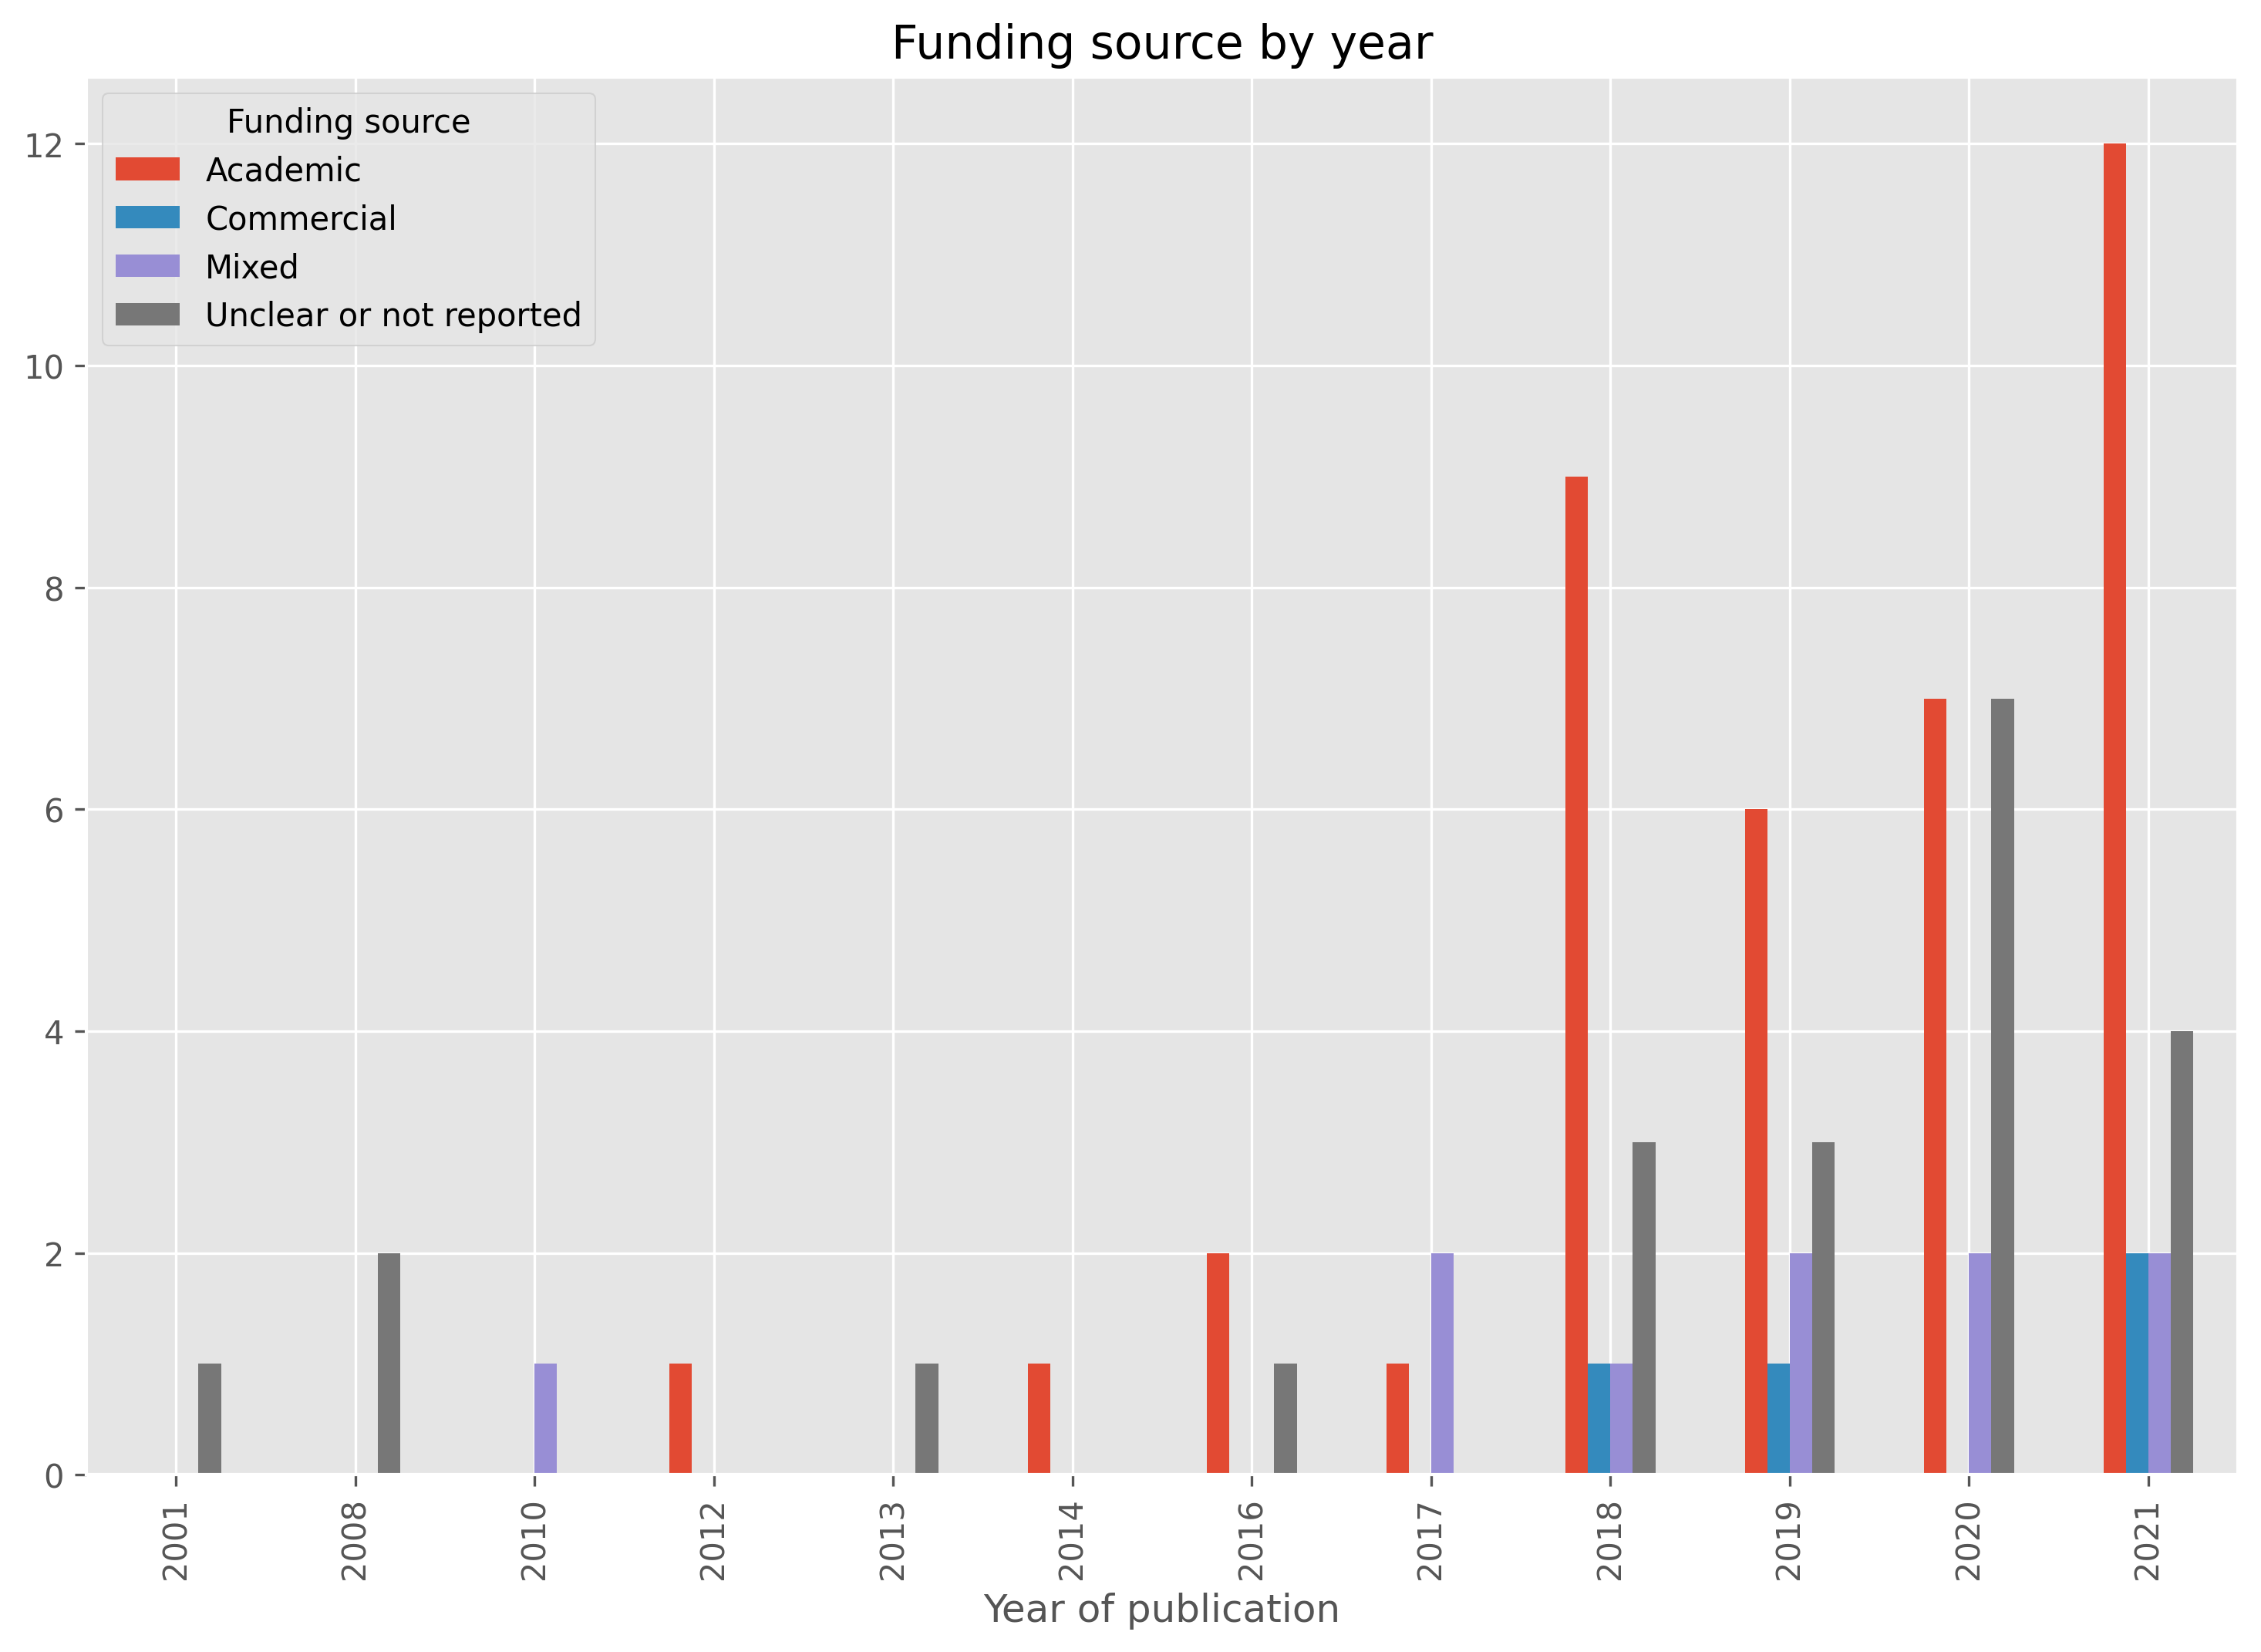

In [42]:
pd.crosstab(papers_df["Year of publication"], papers_df["Funding source"]).plot.bar()
plt.title("Funding source by year")
plt.savefig(os.path.join("out", f"Funding - VS time.png"))
plt.show()

Observations:
 - Overall, 29.3% of the extracted papers have an unclear or unspecified funding source
 - Most papers benefit from academoic funding, but mixed and industry funded papers seem to be on the rise

# Type of algorithm

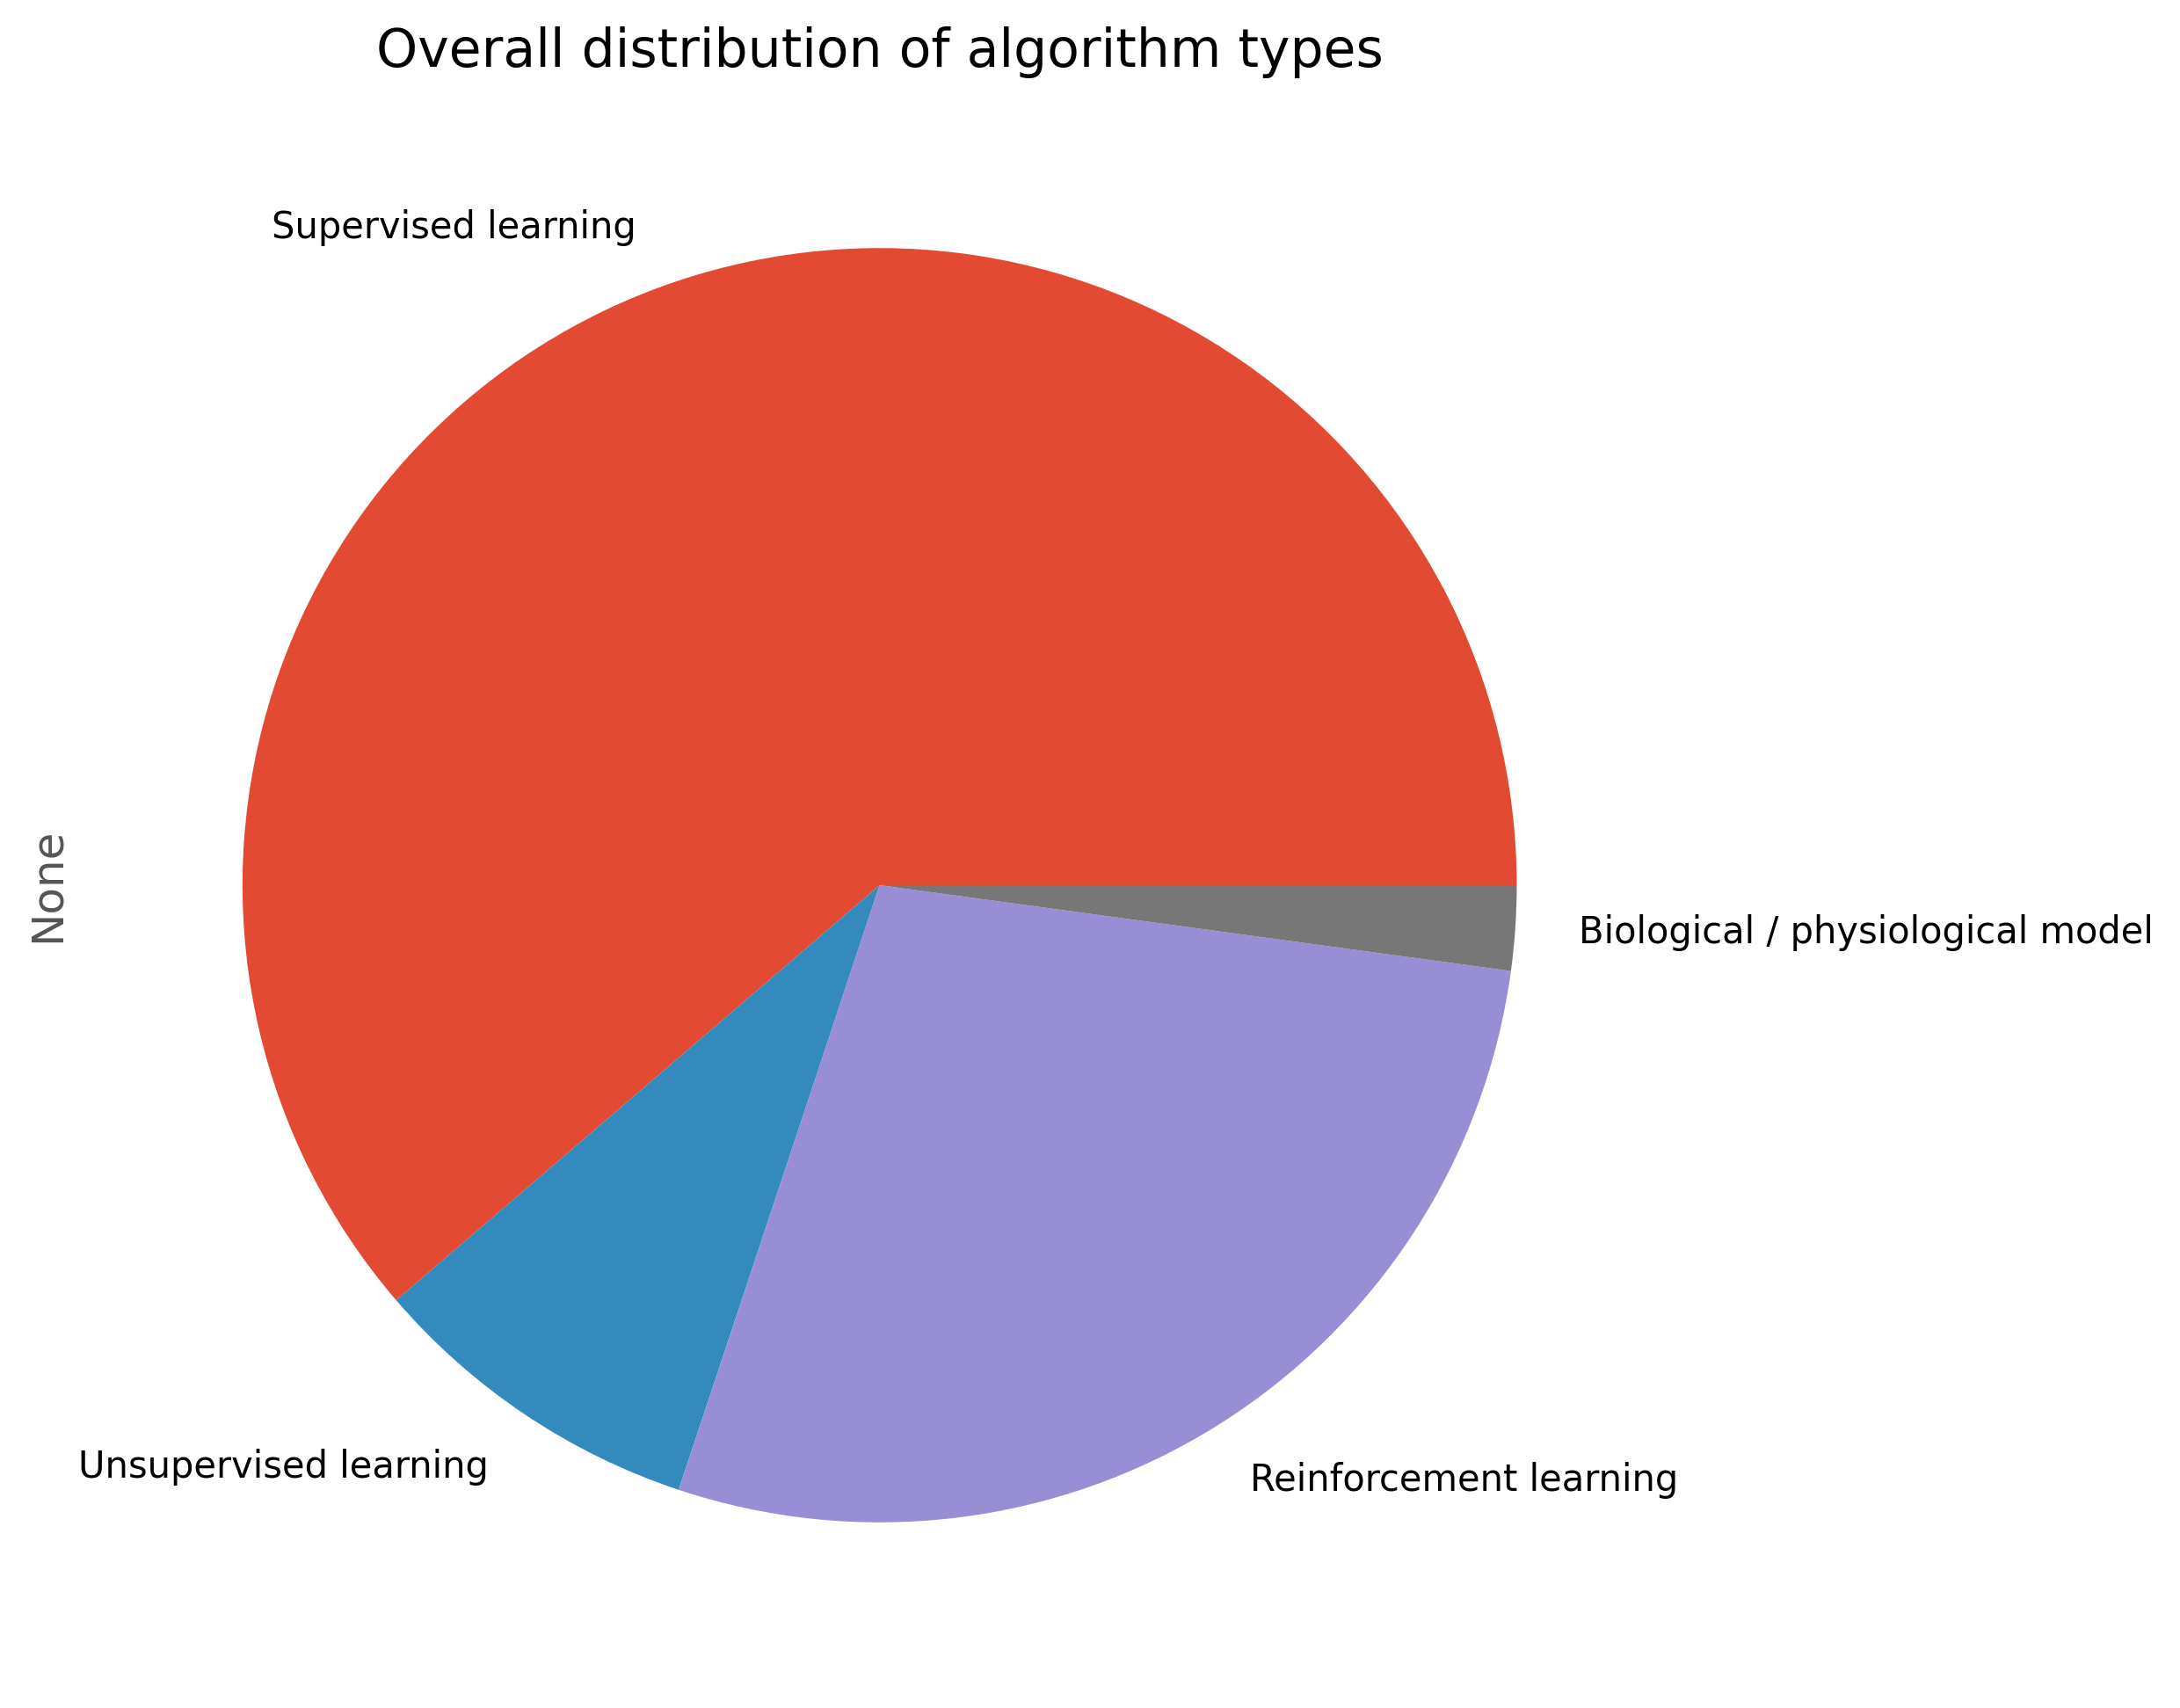

In [53]:
learning_types = ["Supervised learning", "Unsupervised learning", "Reinforcement learning", "Biological / physiological model"]
papers_df[learning_types].sum().plot.pie()
plt.title("Overall distribution of algorithm types")
plt.savefig(os.path.join("out", f"Algorithm - pie.png"))
plt.show()

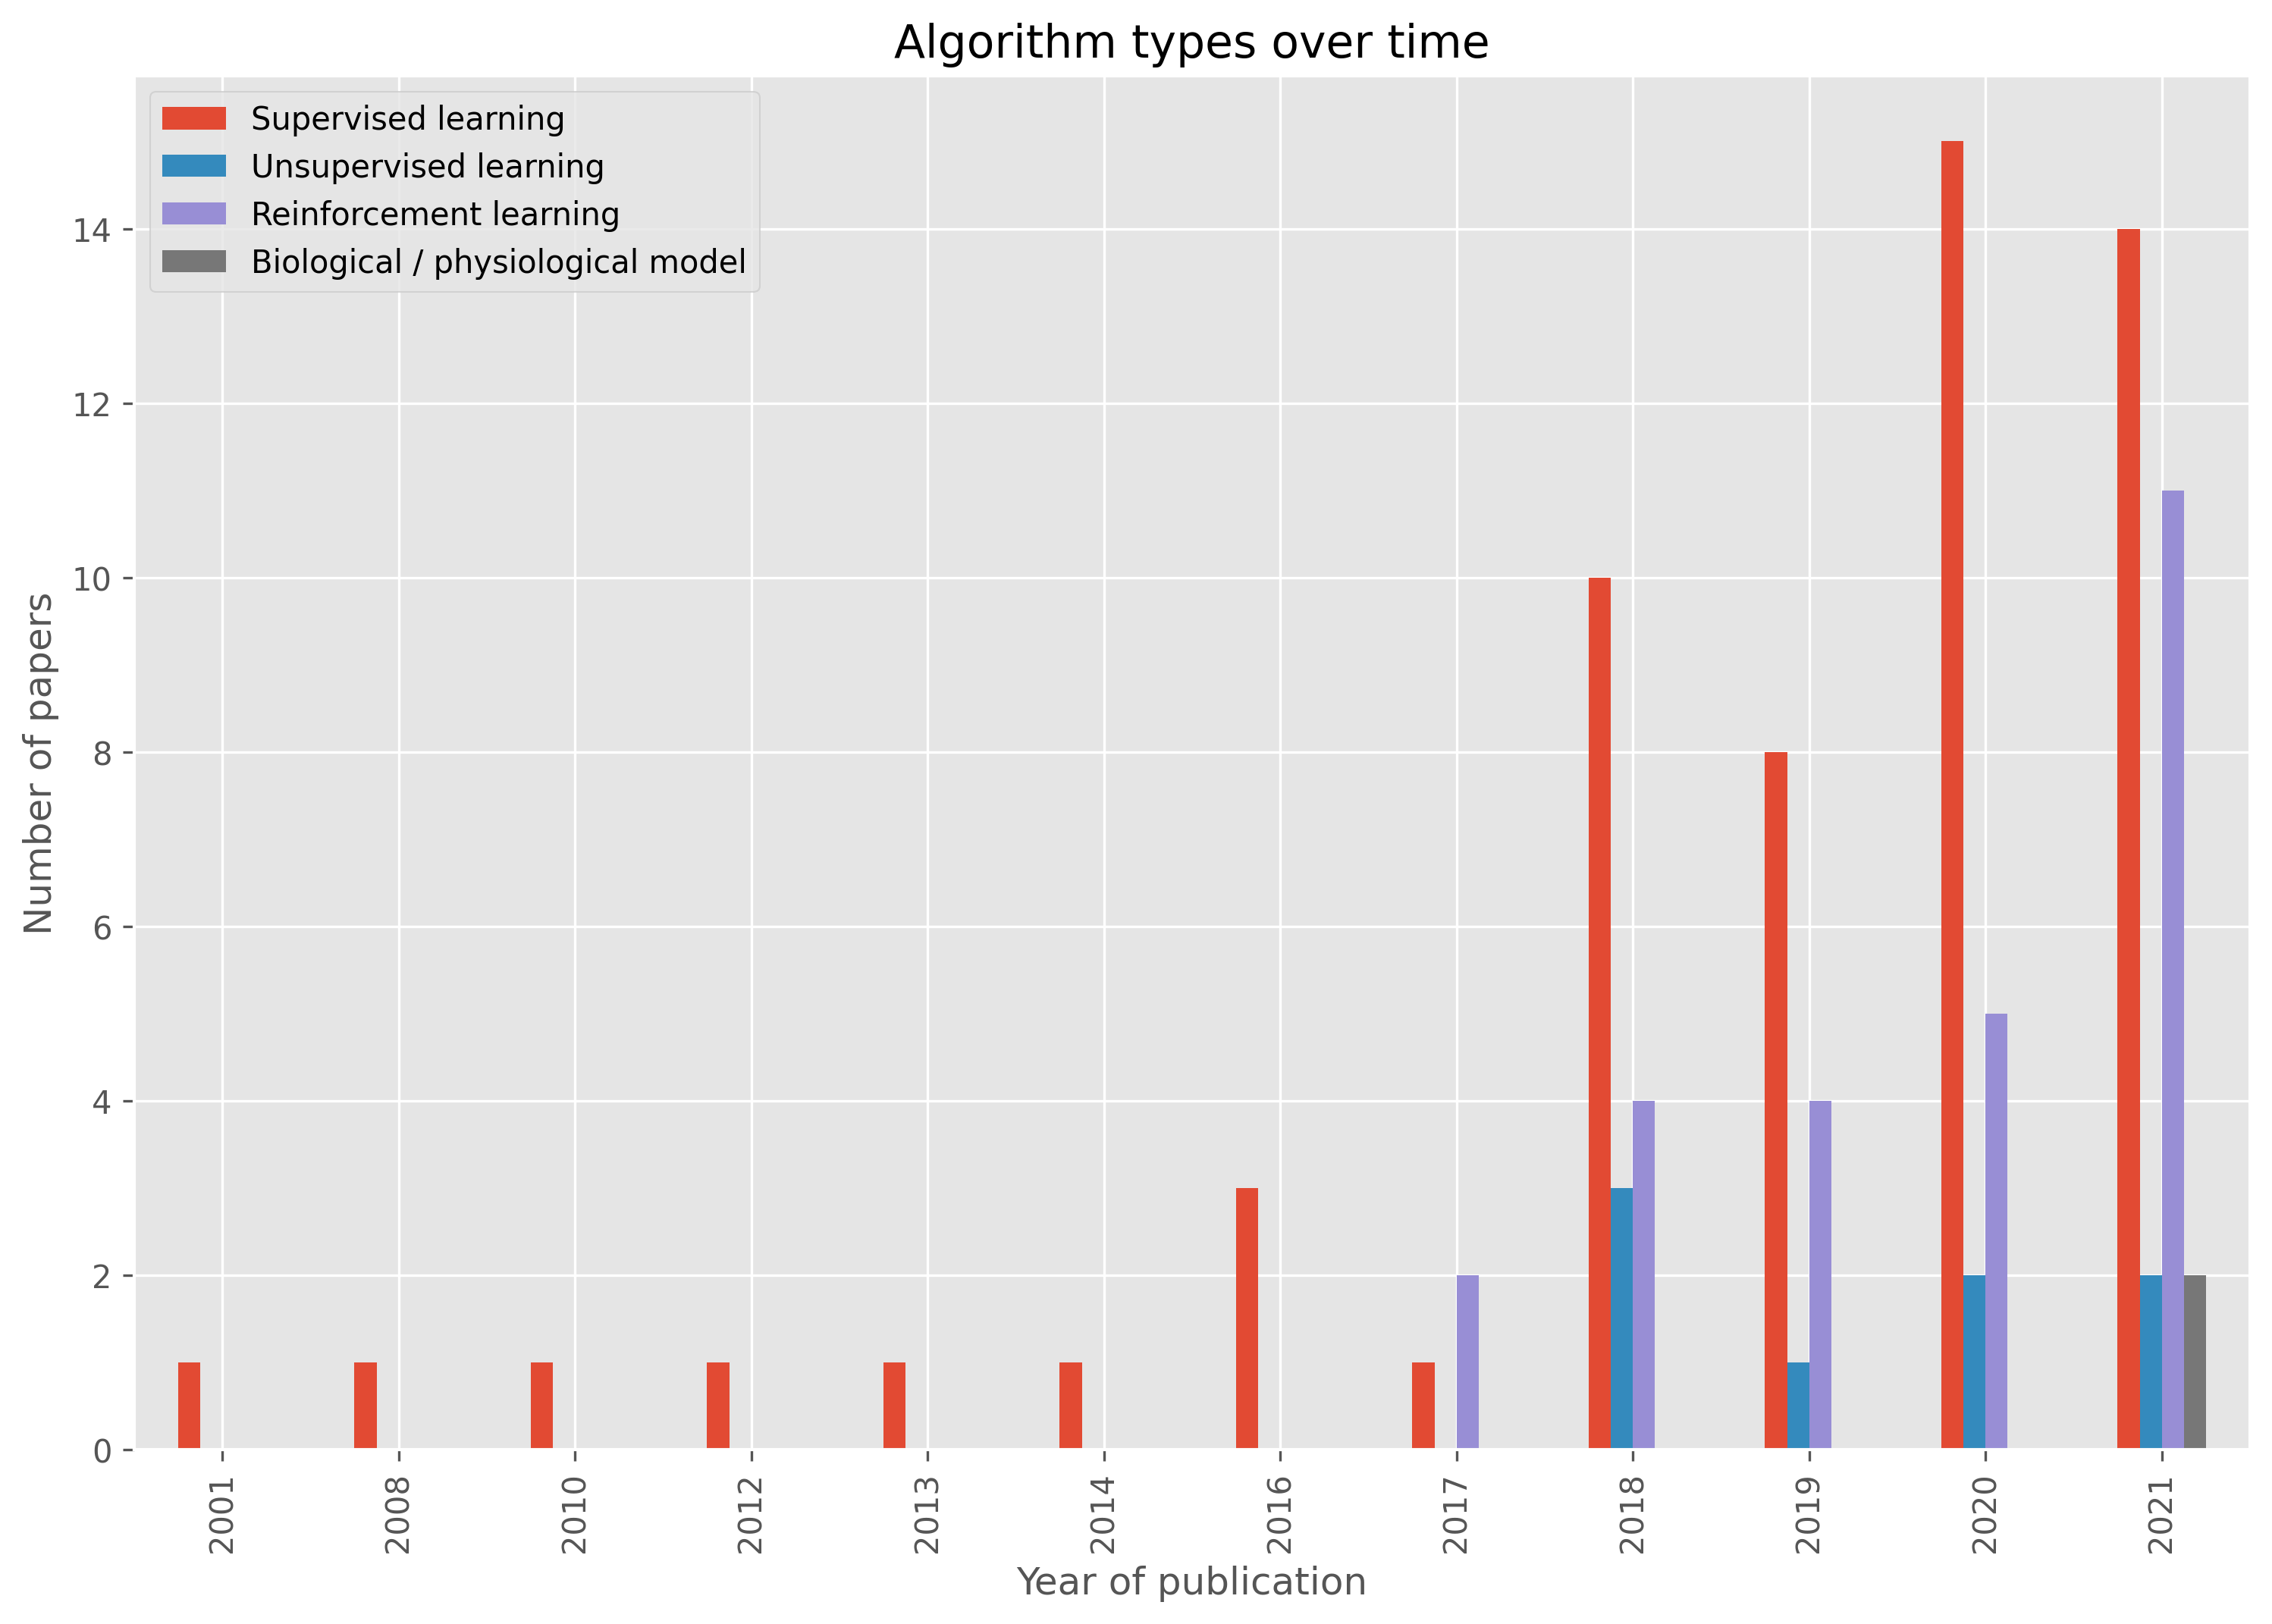

In [54]:
papers_df.groupby("Year of publication")[learning_types].sum().plot.bar()
plt.title("Algorithm types over time")
plt.ylabel("Number of papers")
plt.savefig(os.path.join("out", f"Algorithm - VS time.png"))
plt.show()

Observations:
 - Superviser learning is still the most used method, possibly with the task of mortality.shock prediction
 - Reinforcement Learning has been on the rise since 2017, now representing almost as many papers as superviser learning
 - Ohysiological models are a new player in the field

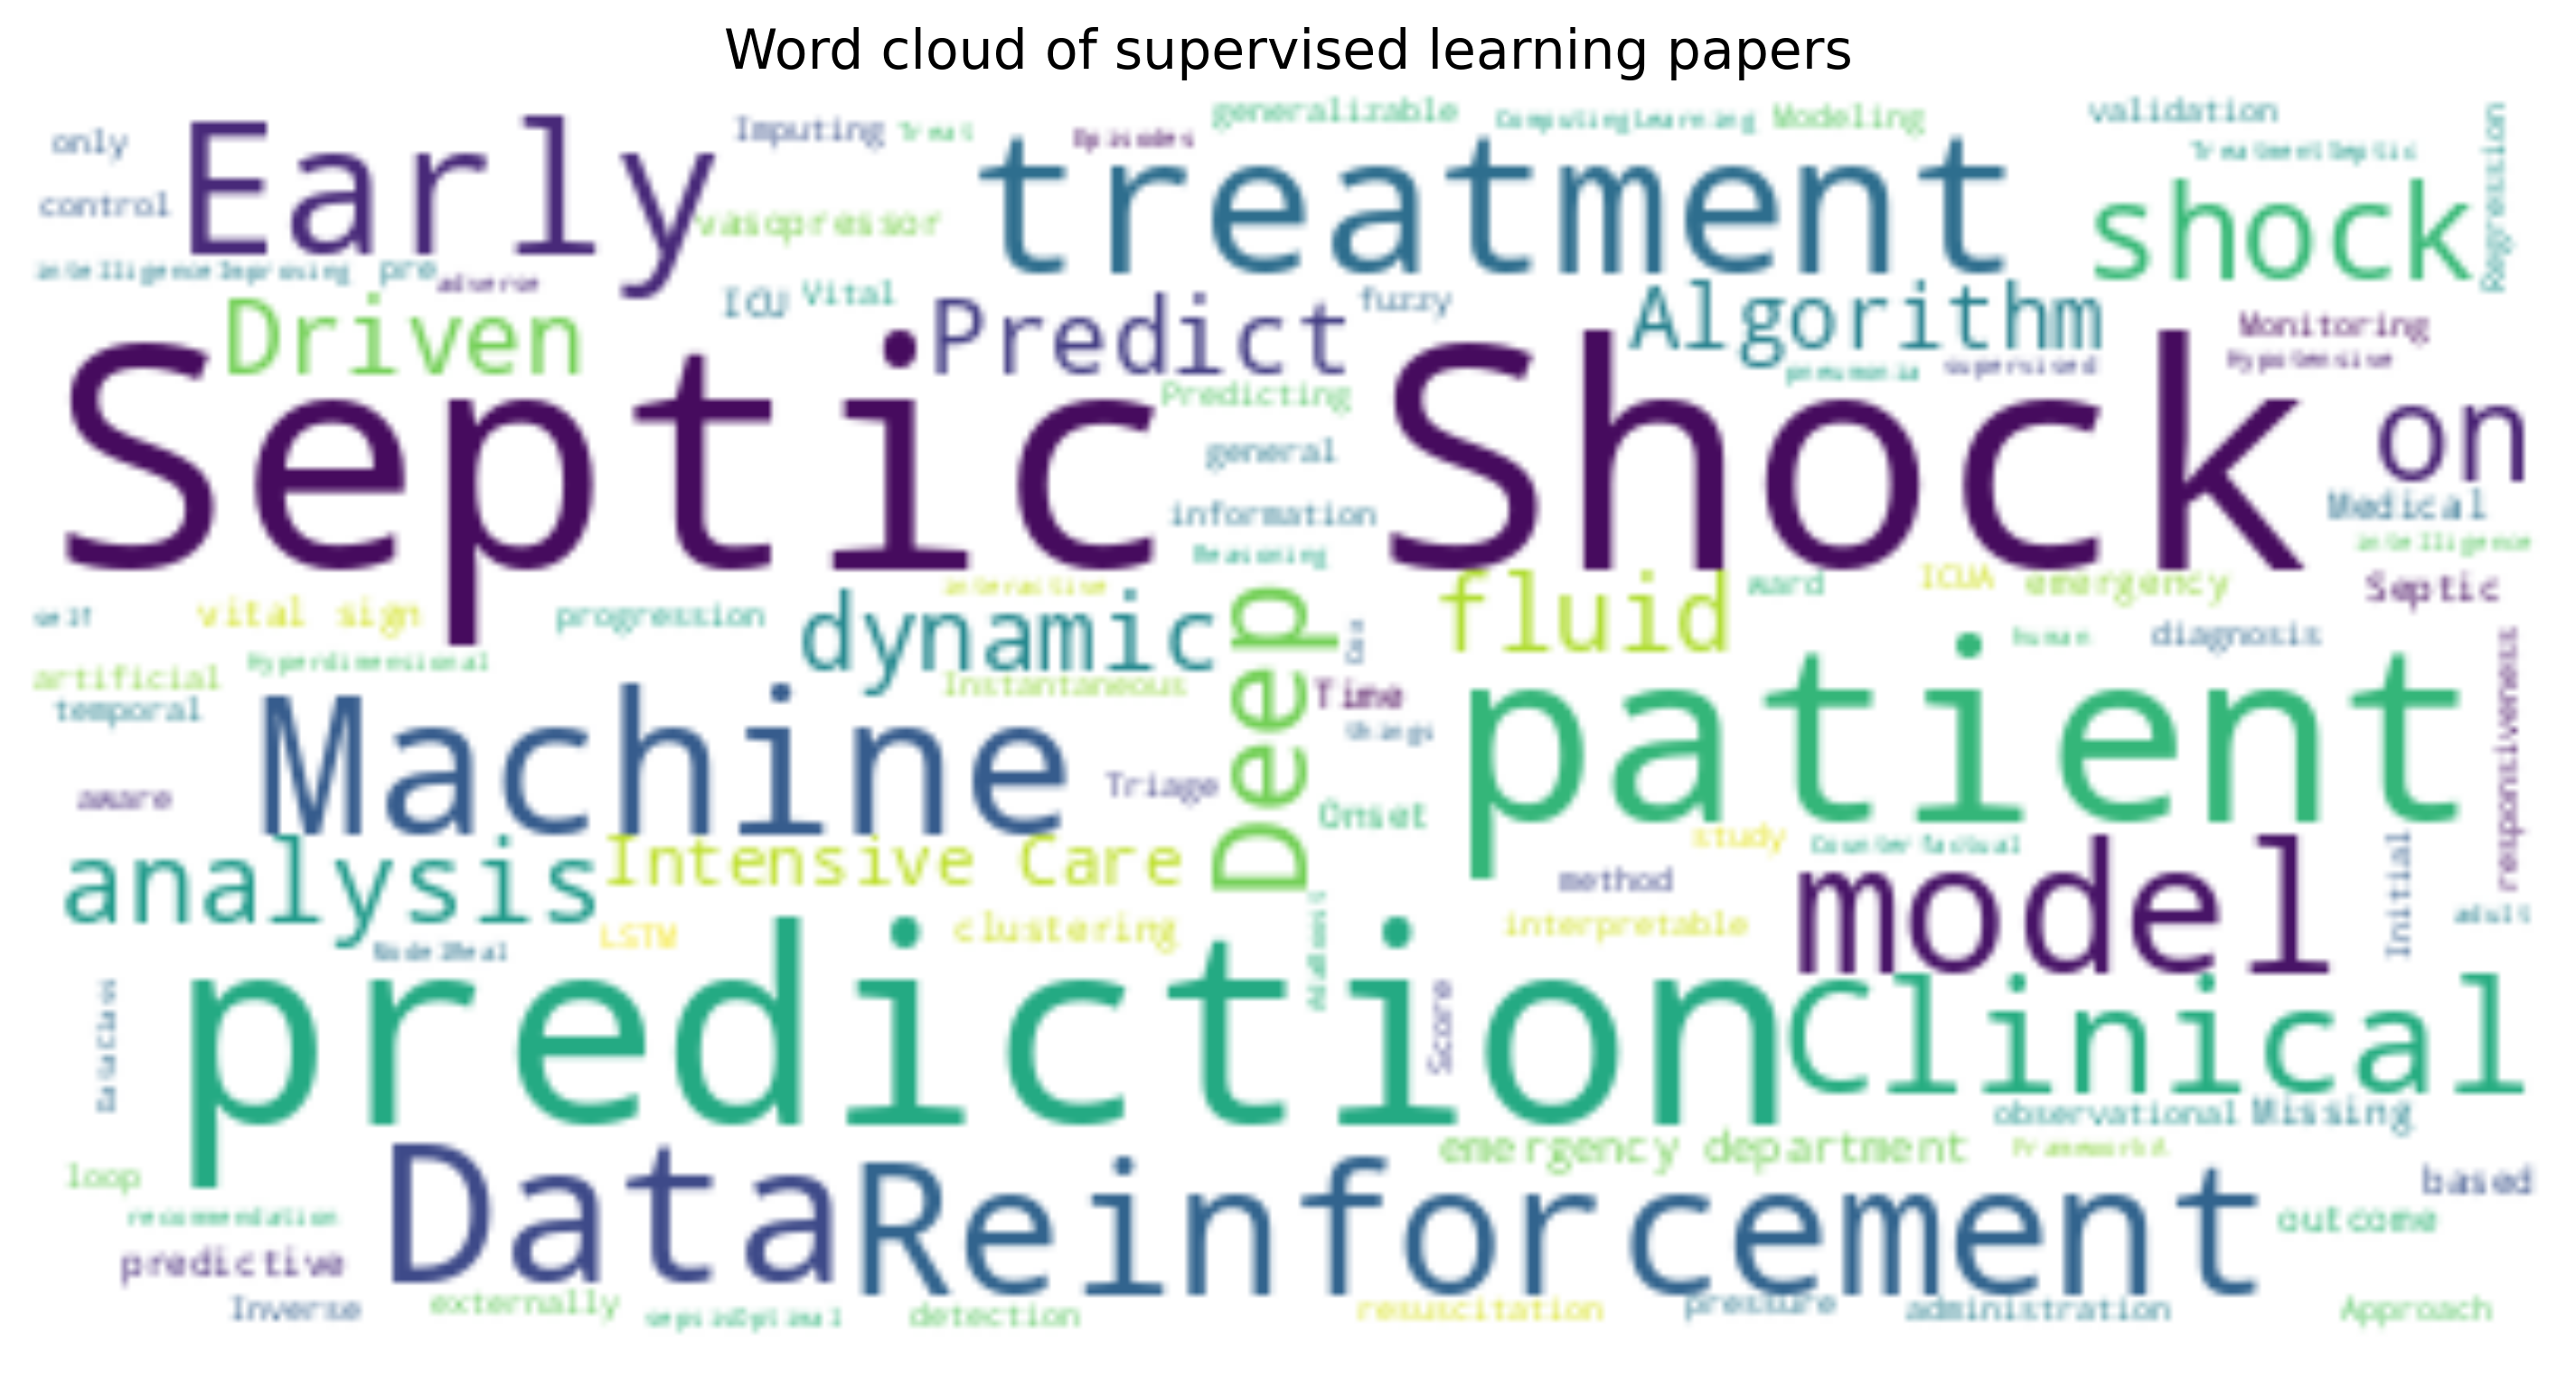

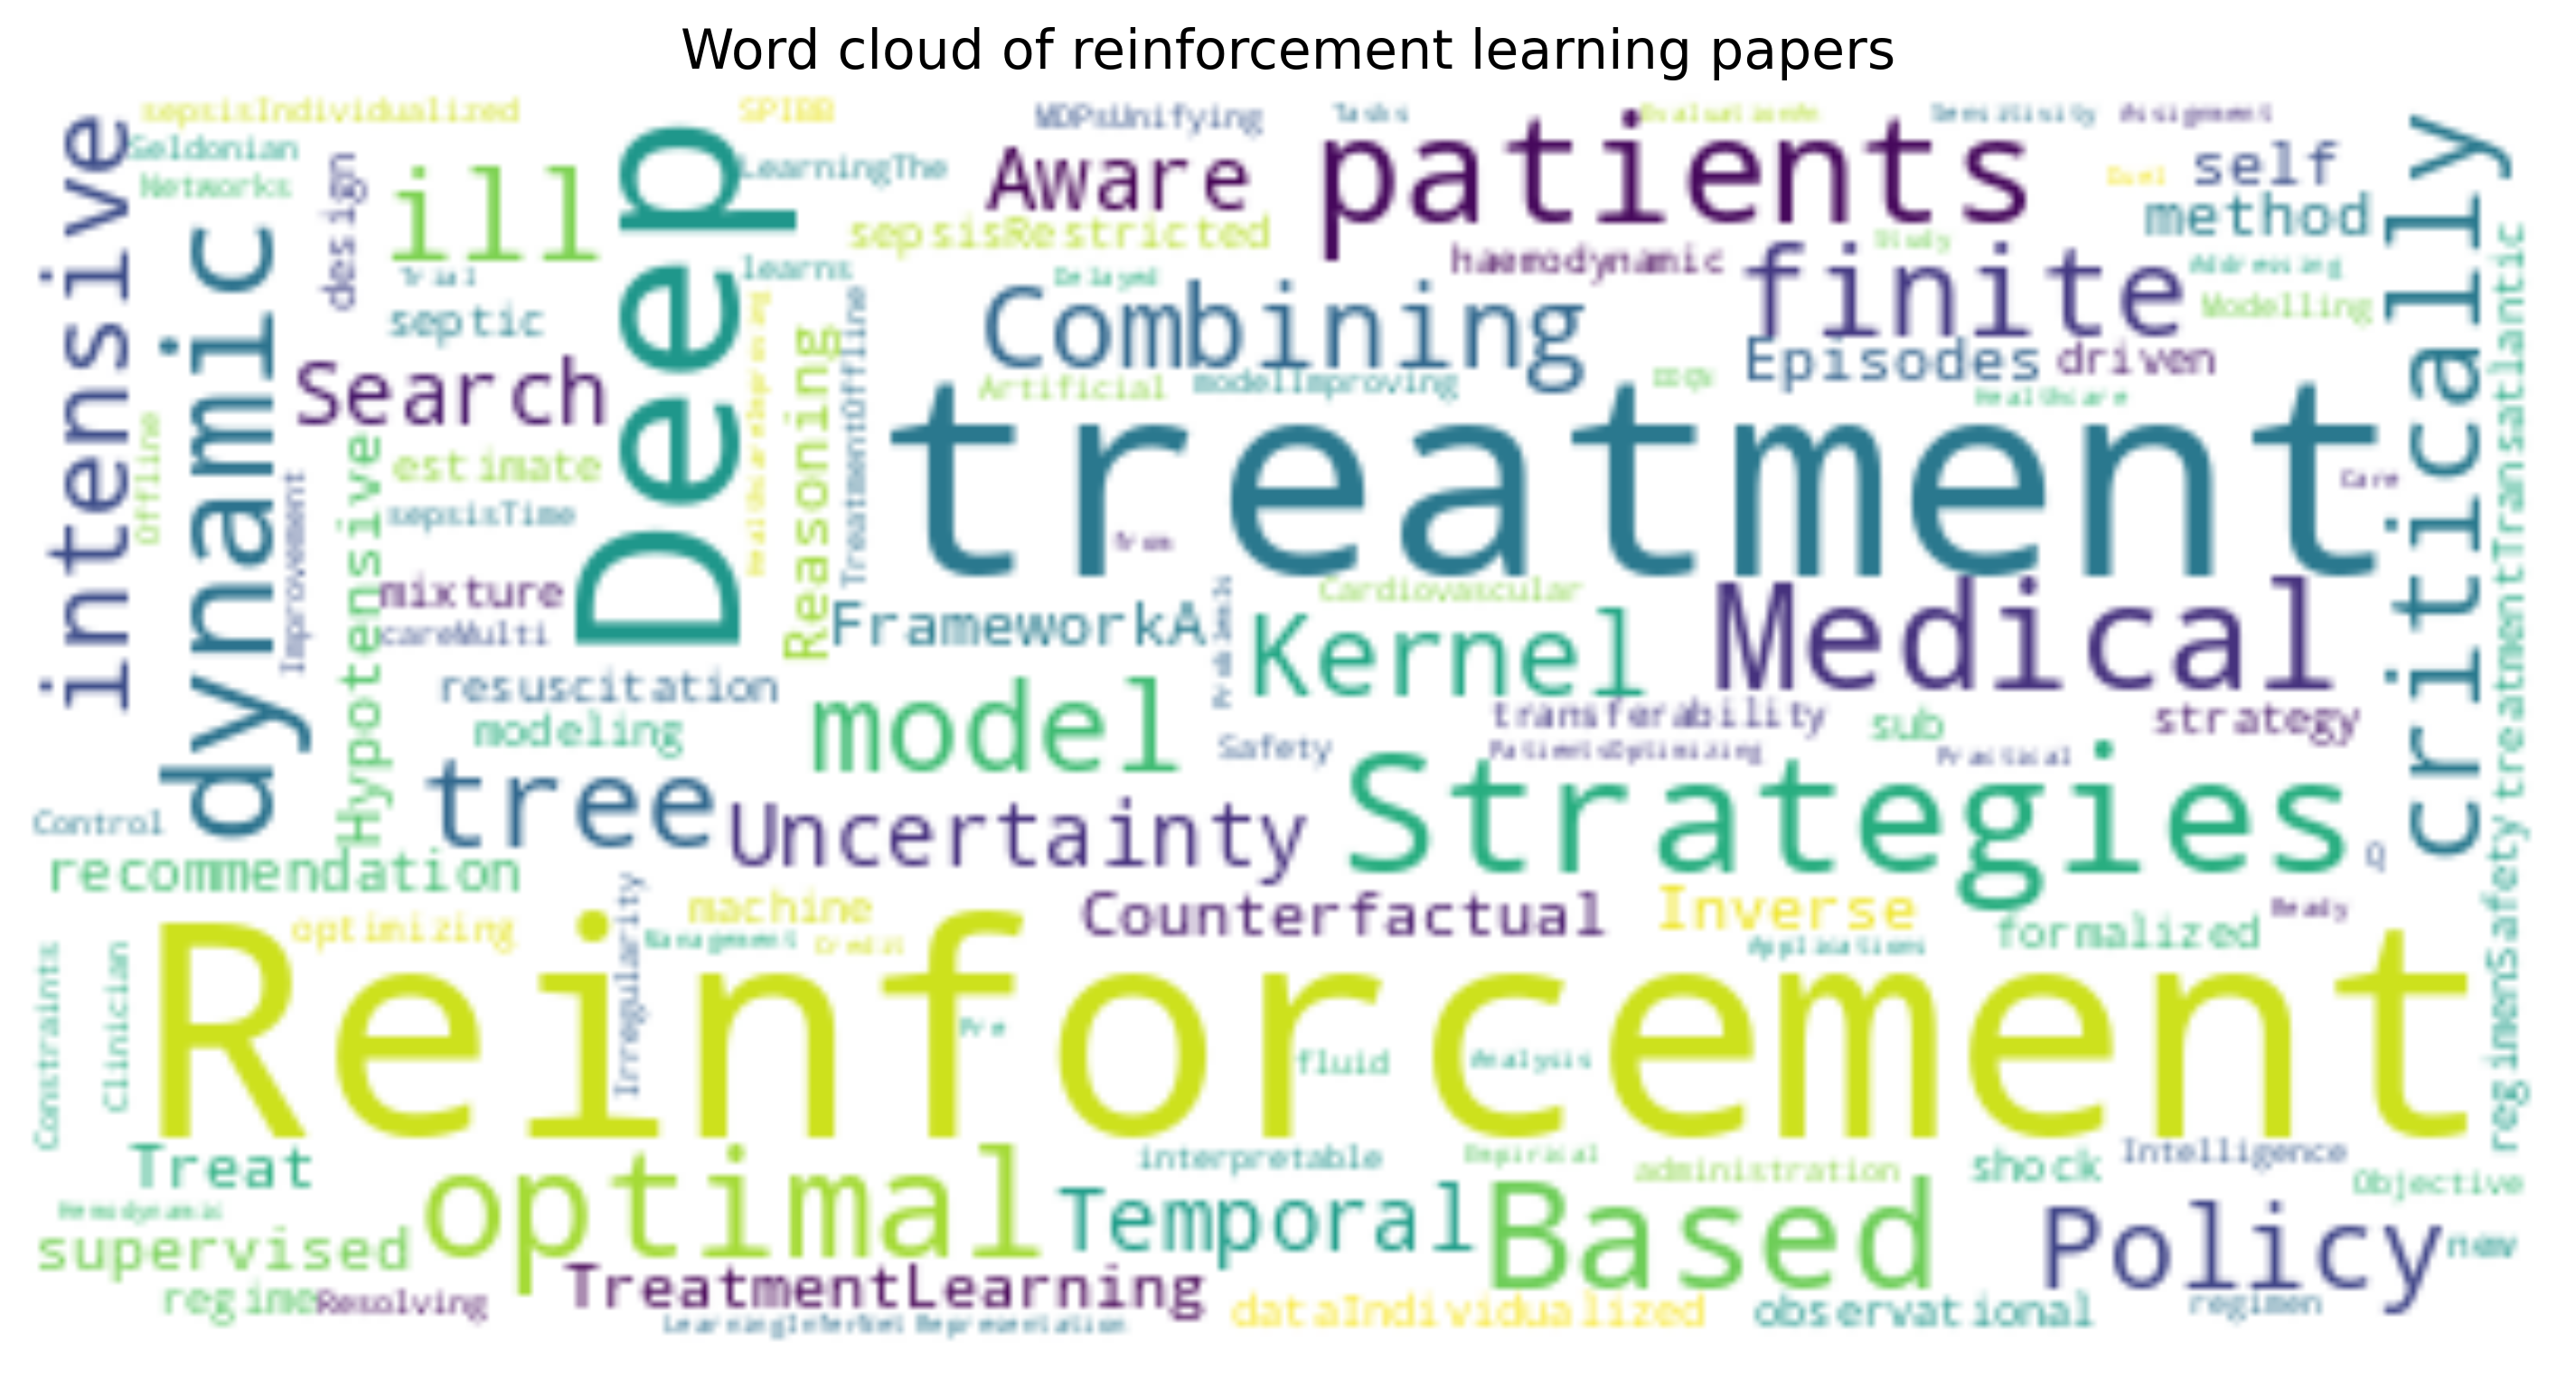

In [52]:
stopwords = ["sepsis", "learning"] + "for of if and the in obn by with using a to an".split(" ")
for learning_type in learning_types:
    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords
    ).generate(
        papers_df[papers_df[learning_type]]["Title"].str.cat(),
    )
    if learning_type in ["Supervised learning", "Reinforcement learning"]:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word cloud of {learning_type.lower()} papers")
        plt.show()
    if learning_type == "Biological / physiological model": learning_type = "Physiological models"
    wordcloud.to_file(os.path.join("out", f"Algorithm - cloud {learning_type}.png"))

Observations:
 - Supervised learning Focus more on septic shoch prediction where RL papers have a bigger interest on treatment
 - The word "Reinforcement"appears in the supervised cloud --> supervised learning is sometimes part of a bigger RL agent

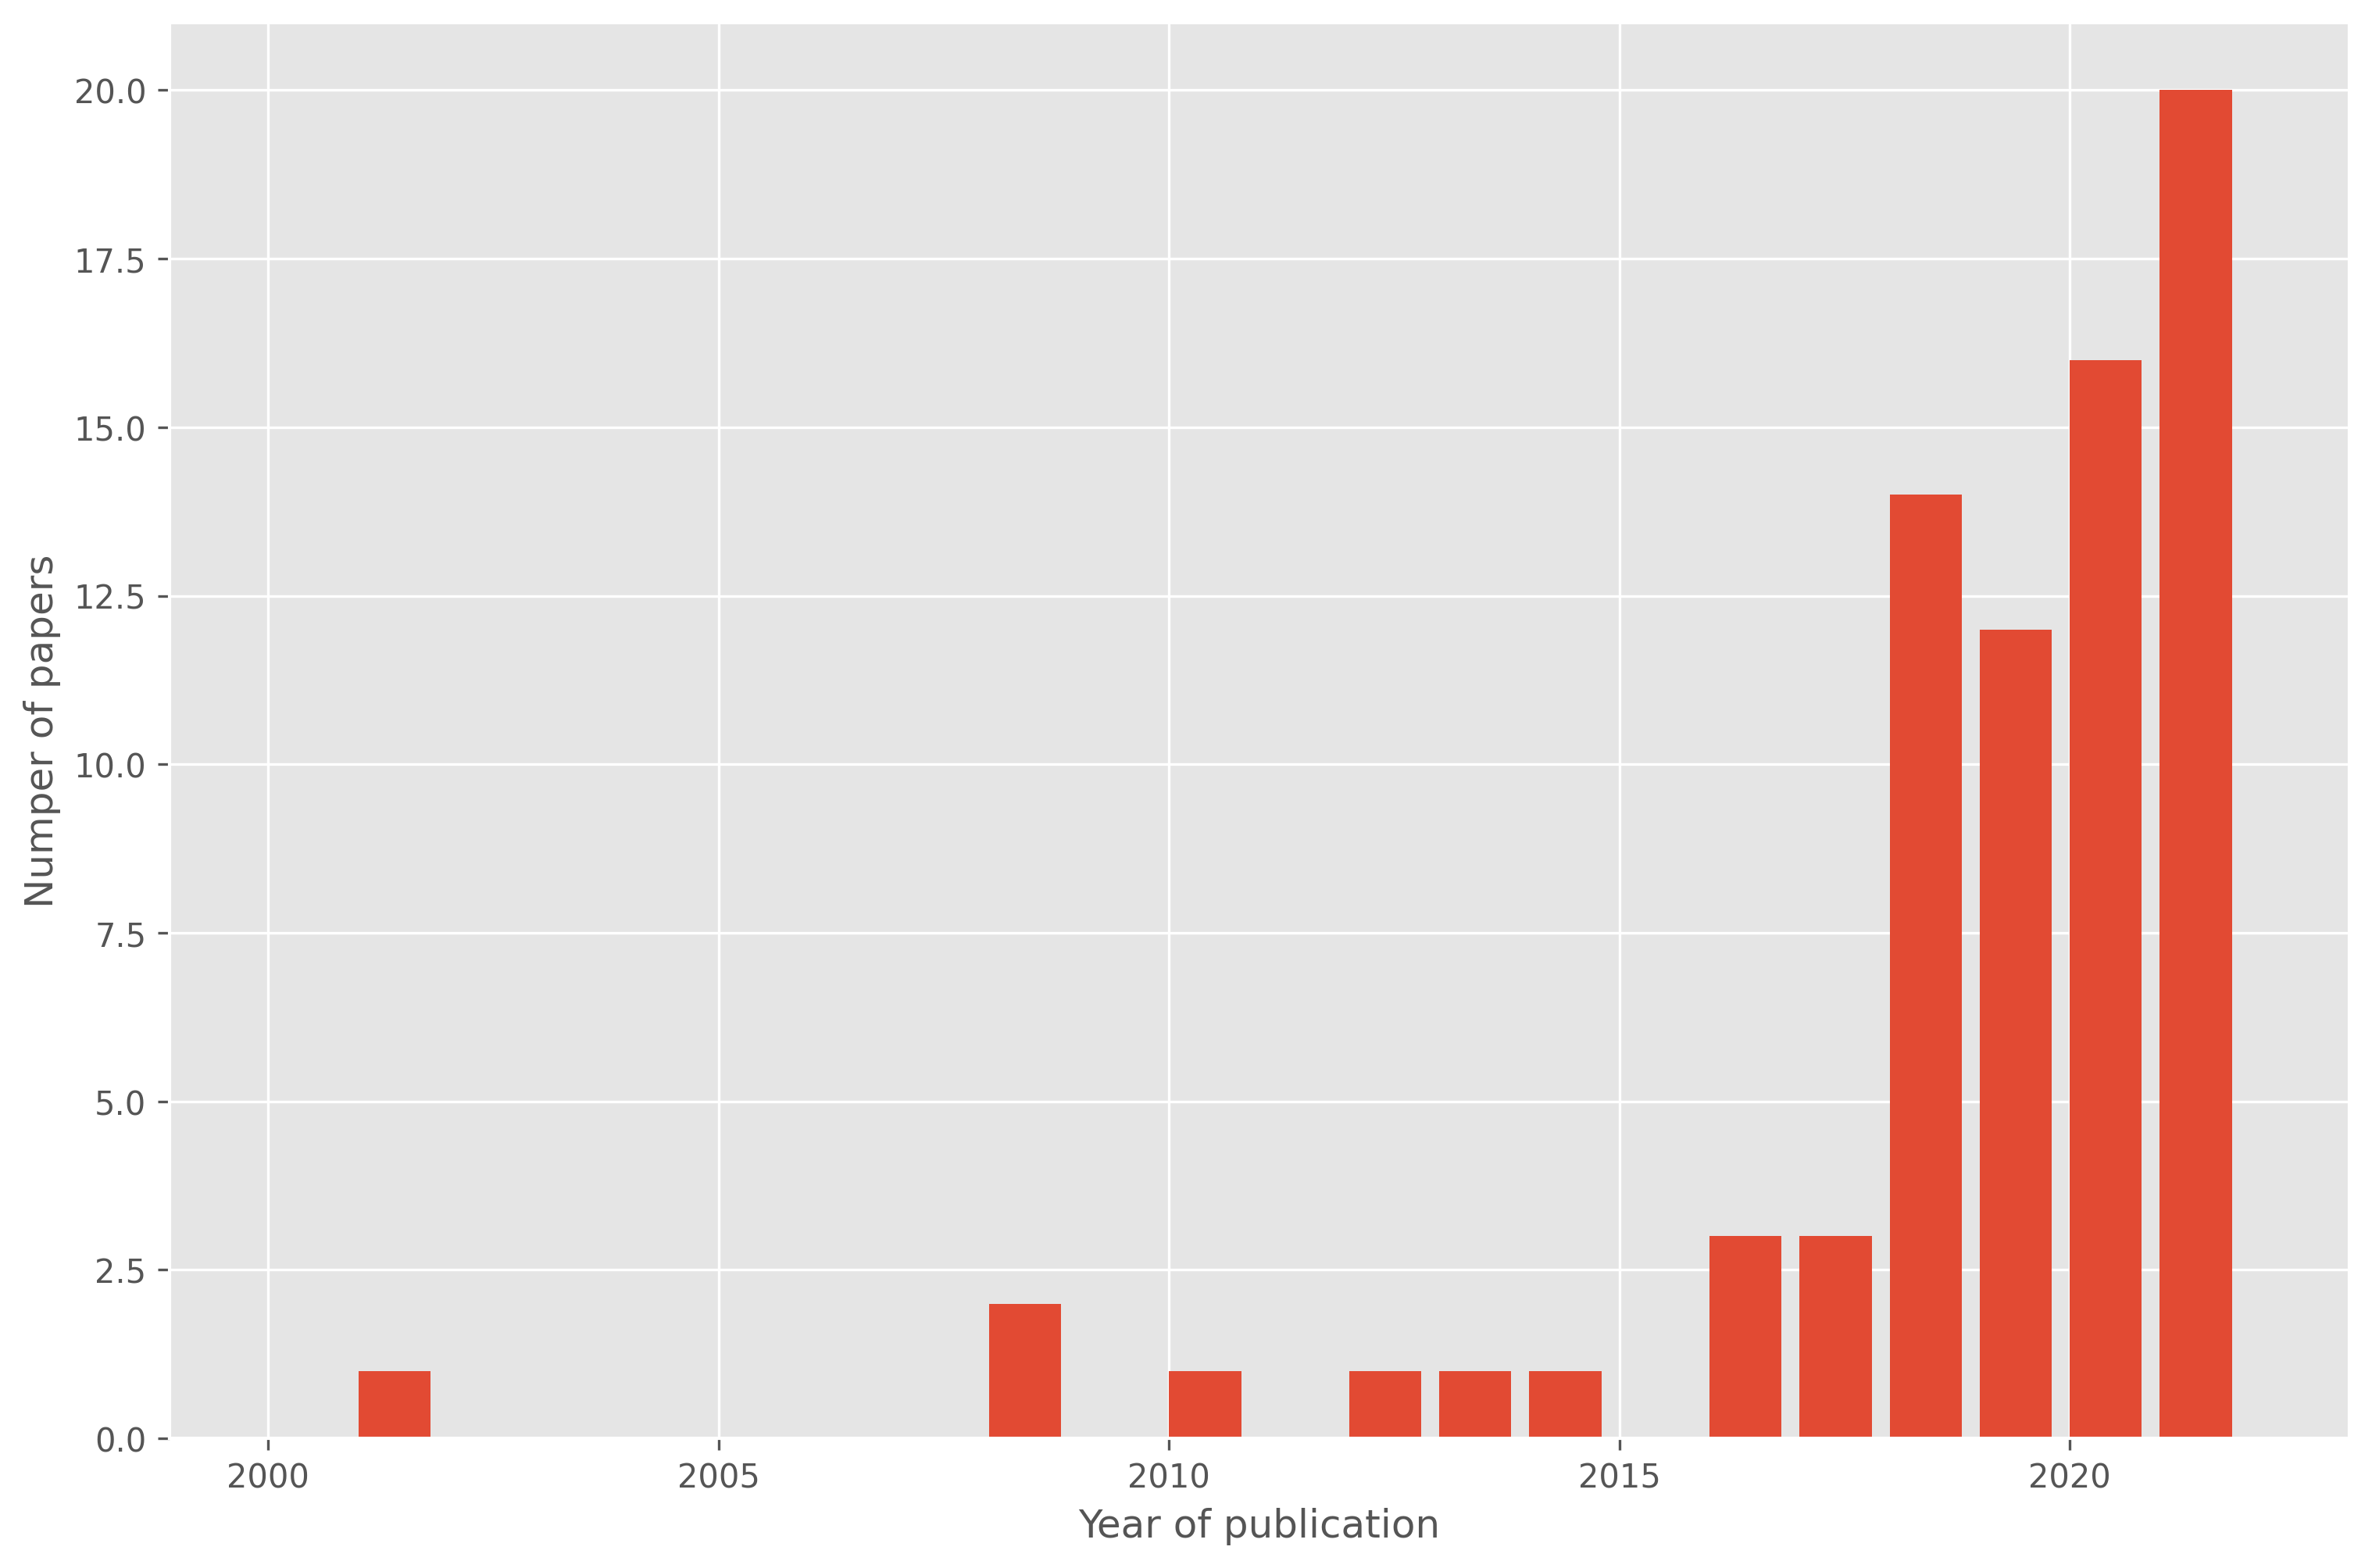

In [47]:
year_bins = list(range(2000, 2023, 1))
papers_df["Year of publication"].plot.hist(bins=year_bins, width=0.8)
plt.xlabel("Year of publication")
plt.ylabel("Numper of papers")
plt.savefig(os.path.join("out", f"Overall - papers VS time.png"))
plt.show()